<a href="https://colab.research.google.com/github/lenessvi/zadaniya-/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [1]:
! pip install pandas scikit-learn seaborn scipy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/drive/MyDrive/employee.csv')
except FileNotFoundError:
    df = pd.read_csv('employee.csv')

y = df['time_spend_company'] # выбираем целевую переменную (количественная)
X = df.drop('time_spend_company', axis=1) # переменные для проверки влияния

In [6]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,0,0,sales,low,1
1,0.80,0.86,5,262,0,0,sales,medium,1
2,0.11,0.88,7,272,0,0,sales,medium,1
3,0.72,0.87,5,223,0,0,sales,low,1
4,0.37,0.52,2,159,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,0,0,support,low,1
14995,0.37,0.48,2,160,0,0,support,low,1
14996,0.37,0.53,2,143,0,0,support,low,1
14997,0.11,0.96,6,280,0,0,support,low,1


Преобразование категориальных переменных остается без изменений

In [7]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['object']).columns # собираем колонки помеченные как object

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [8]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,0,0,1,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,0,0,1,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,0,0,1,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,0,0,1,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,0,0,1,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,2,160,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,2,143,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,6,280,0,0,1,False,False,False,False,False,False,False,True,False,True,False


In [9]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,y
0,0.38,0.53,2,157,0,0,1,False,False,False,False,False,False,True,False,False,True,False,3
1,0.80,0.86,5,262,0,0,1,False,False,False,False,False,False,True,False,False,False,True,6
2,0.11,0.88,7,272,0,0,1,False,False,False,False,False,False,True,False,False,False,True,4
3,0.72,0.87,5,223,0,0,1,False,False,False,False,False,False,True,False,False,True,False,5
4,0.37,0.52,2,159,0,0,1,False,False,False,False,False,False,True,False,False,True,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,0,0,1,False,False,False,False,False,False,False,True,False,True,False,3
14995,0.37,0.48,2,160,0,0,1,False,False,False,False,False,False,False,True,False,True,False,3
14996,0.37,0.53,2,143,0,0,1,False,False,False,False,False,False,False,True,False,True,False,3
14997,0.11,0.96,6,280,0,0,1,False,False,False,False,False,False,False,True,False,True,False,4


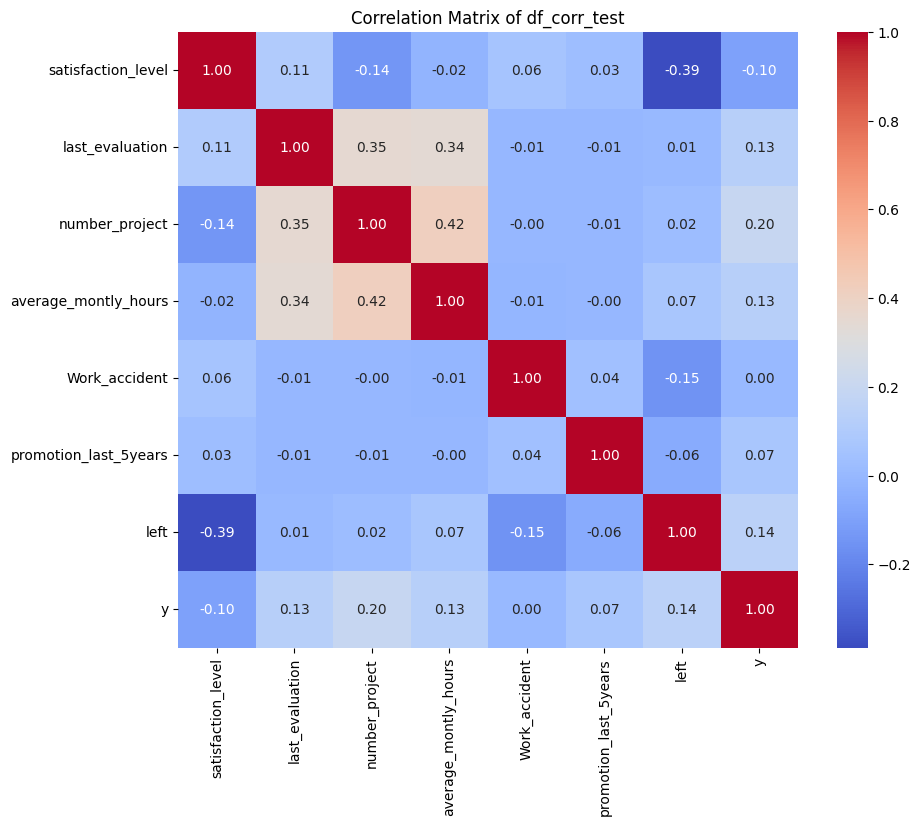

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [12]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать


Regularization: None
Mean Absolute Error (MAE): 0.97
Mean Squared Error (MSE): 1.94
R^2 Score: 0.08


In [14]:
resolve_regression(X[['last_evaluation','satisfaction_level','average_montly_hours']], y)
None


Regularization: None
Mean Absolute Error (MAE): 1.00
Mean Squared Error (MSE): 2.02
R^2 Score: 0.03


Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [15]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,0,0,1,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,0,0,1,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,0,0,1,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,0,0,1,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,0,0,1,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,2,160,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,2,143,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,6,280,0,0,1,False,False,False,False,False,False,False,True,False,True,False


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   Work_accident           14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   department_RandD        14999 non-null  bool   
 8   department_accounting   14999 non-null  bool   
 9   department_hr           14999 non-null  bool   
 10  department_management   14999 non-null  bool   
 11  department_marketing    14999 non-null  bool   
 12  department_product_mng  14999 non-null  bool   
 13  department_sales        14999 non-null  bool   
 14  department_support      14999 non-null

Отбор признаков по корреляции

In [17]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [19]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [20]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 0.97
Mean Squared Error (MSE): 1.96
R^2 Score: 0.07


In [21]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 1.00
Mean Squared Error (MSE): 1.99
R^2 Score: 0.05


Regularization: None
Mean Absolute Error (MAE): 1.00
Mean Squared Error (MSE): 1.99
R^2 Score: 0.05


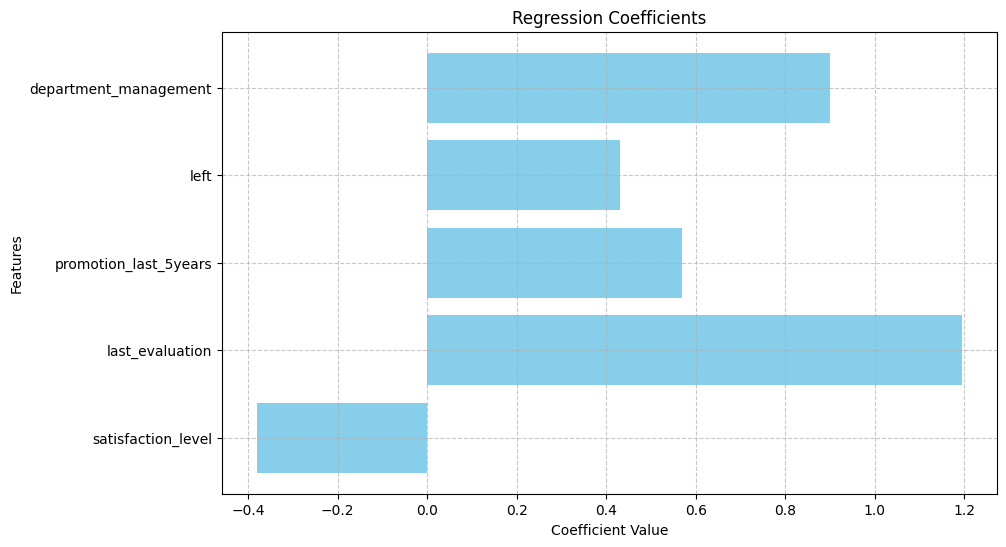

In [22]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Например, положительный коэффициент для `type_white` указывает, что этот тип вина повышает прогнозируемое значение. Наибольшее влияние на модель оказывают признаки `type_white`, `density` и `volatile acidity`.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 0.35 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 0.20 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.86 — модель объясняет 86% дисперсии данных, что указывает на высокую точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [23]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['float64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


<ipython-input-23-a7ff67a7c8f6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [24]:
X_selected_rfe

,satisfaction_level,last_evaluation,promotion_last_5years,left,department_management
0,0.318681,0.265625,0,1,False
1,0.780220,0.781250,0,1,False
2,0.021978,0.812500,0,1,False
3,0.692308,0.796875,0,1,False
4,0.307692,0.250000,0,1,False
...,...,...,...,...,...
14994,0.340659,0.328125,0,1,False
14995,0.307692,0.187500,0,1,False
14996,0.307692,0.265625,0,1,False
14997,0.021978,0.937500,0,1,False


Regularization: None
Mean Absolute Error (MAE): 1.00
Mean Squared Error (MSE): 1.99
R^2 Score: 0.05


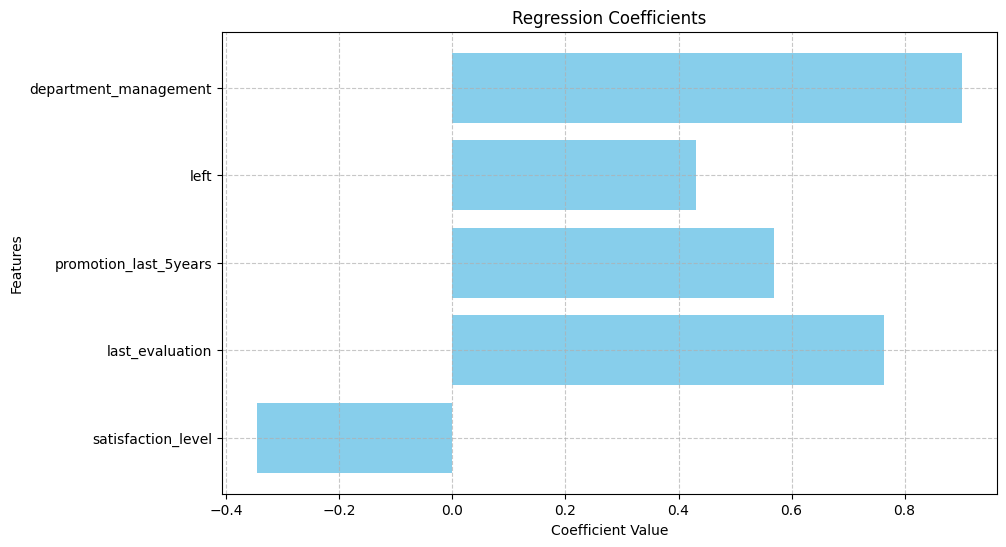

In [25]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [26]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 1.00
Mean Squared Error (MSE): 1.99
R^2 Score: 0.05


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [27]:
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,Work_accident,promotion_last_5years,left,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,0,0,1,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,0,0,1,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,0,0,1,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,0,0,1,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,0,0,1,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,2,160,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,2,143,0,0,1,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,6,280,0,0,1,False,False,False,False,False,False,False,True,False,True,False


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 1.04
Mean Squared Error (MSE): 2.07
R^2 Score: 0.01


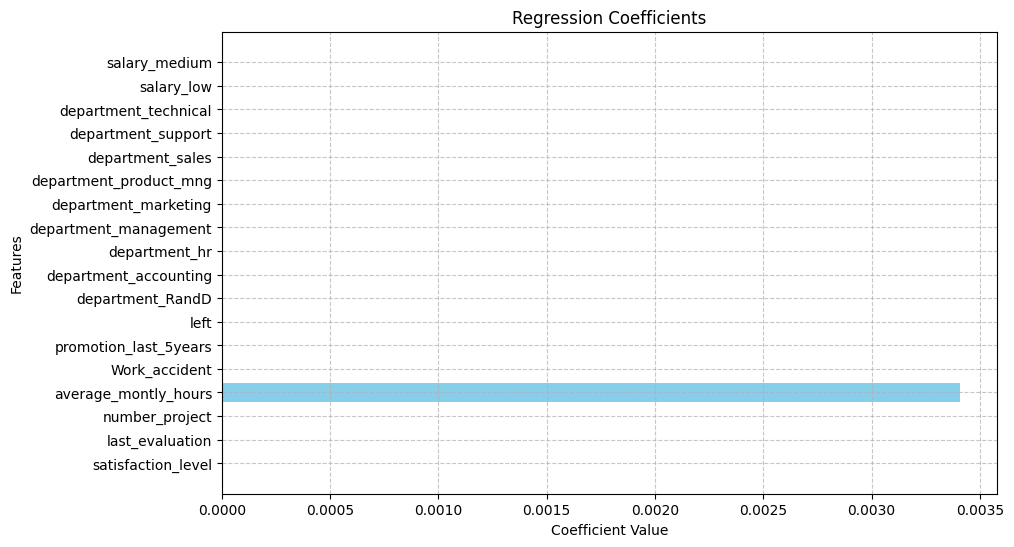

In [28]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 0.97
Mean Squared Error (MSE): 1.94
R^2 Score: 0.08


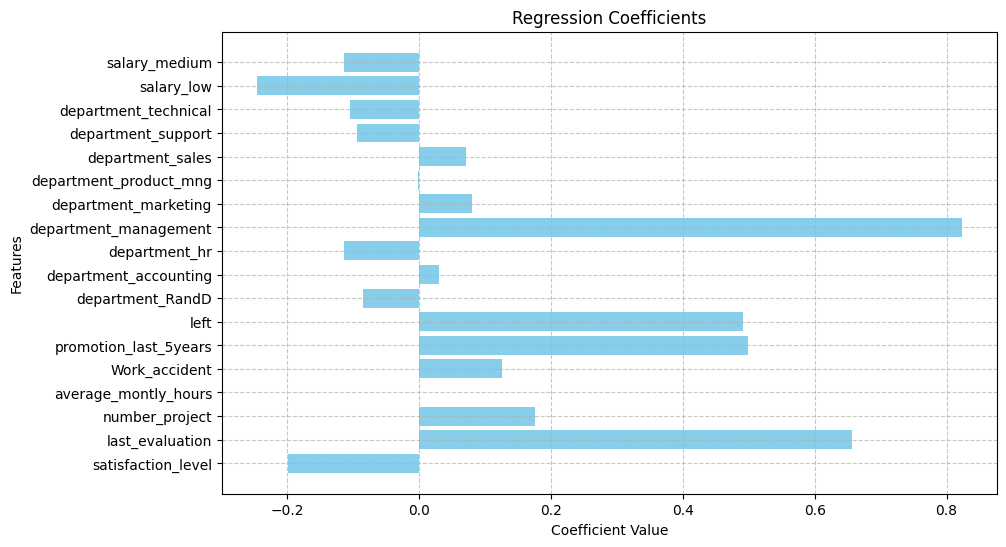

In [29]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 0.97
Mean Squared Error (MSE): 1.94
R^2 Score: 0.08


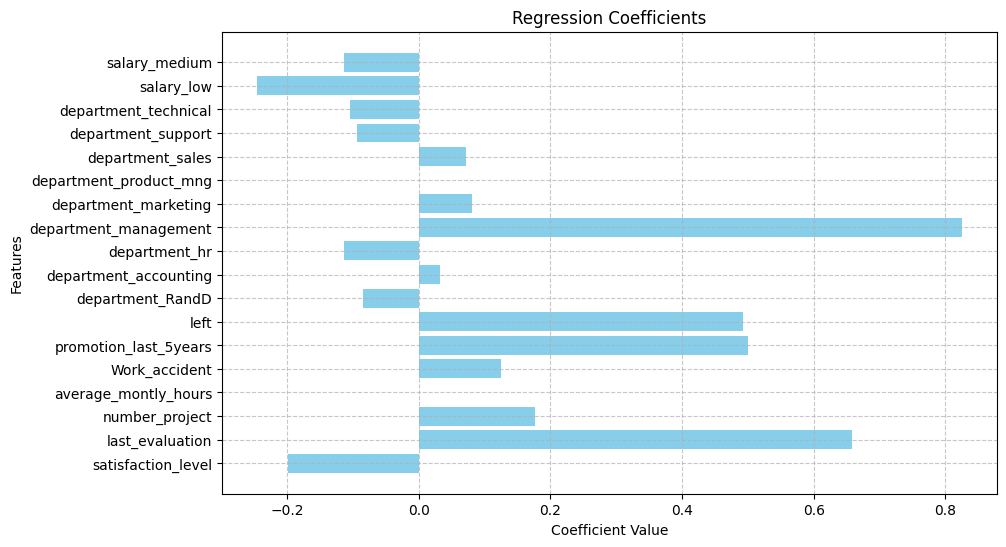

In [30]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)
